# 평균 해시 매칭

In [4]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

img = cv2.imread('pistol.jpeg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray = cv2.resize(img_gray, (16,16)) # 16 X 16 이미지로 축소, 각 픽셀은 0~255값을 가짐
avg = img_gray.mean() # 픽셀의 값을 다더하여 전체픽셀 개수로 나눔
img_gray > avg # 평균값 보다 큰지  True, False로만 구성

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False,  True, False,
        False,  True,  True,  True,  True,  True,  True],
       [ True,  True, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [ True,  True, False, False, False, False, False,  True,  True,
         True,  True,  Tru

In [5]:
bin = 1 * (img_gray > avg) # True에 1을 곱하고, False는 0
bin

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [6]:
dhash = []
for row in bin.tolist():
    # print(row) # [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    a = [str(i) for i in row] # ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
    s = ''.join(a) # 1111111111111111
    # int(s,2) # s "문자열"은 "2진수" 이며, "10진수 정수로" 표현하겠다 는 의미
    dhash.append('%02x'%(int(s,2))) # ['ffff', '8000', '8000', '8000', '8000', '813f', 'c1ff', 'c1ff', 'c07f', 'c3ff', 'c7ff', 'c7ff', '87ff', '87ff', '87ff', 'c7ff']
    # format(s, 02x) : 16진수, 2자리수, 2자리수가안되면0으로 채움, 소문자
dhash = ''.join(dhash)
print(dhash)

ffff8000800080008000813fc1ffc1ffc07fc3ffc7ffc7ff87ff87ff87ffc7ff


[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1]]


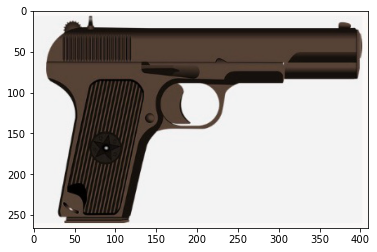

In [7]:
print(bin)
plt.imshow(img)

# 해밍거리 매칭

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [9]:
img = cv2.imread('pistol.jpeg')

# 비교할 이미지가 있는 경로
search_dir = '101_ObjectCategories' 

# 이미지를 16 X 16 크기의 평균 해시로 변환하는 하는 함수
def img2hash(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (16, 16))
    avg = gray.mean()
    bin = 1 * (gray > avg) # binary
    return bin

 # 해밍거리 측정 함수
def hamming_distance(a, b):
    a = a.reshape(1, -1) # 1행 n열로 배열 변환
    b = b.reshape(1, -1) 
    # 같은 자리의 값이 서로 다른 것들을 1로 하여 합한것
    distance = (a != b).sum() # True(같지않음)인것을 1로하여 합한다
    return distance

In [10]:
aa = img2hash(img)[0]
print(aa)
bb = img2hash(img)[1]
print(bb)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
aa != bb

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [12]:
# 권총 이미지의 해시
query_hash = img2hash(img)
query_hash

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [13]:
img_path = glob.glob(search_dir+'/**/*.jpg') # jpg로 끝나는 모든 경로가 list로 담긴다
for path in img_path:
    img = cv2.imread(path)
    a_hash = img2hash(img) # 읽어온 이미지를 해시로
    dst = hamming_distance(query_hash, a_hash) # 각 자리의 값을 비교(해밍거리)해 차이나는것만 더한다
    if dst/256 < 0.25: # 해밍거리 25% 이내만 출력
        print(path, dst/256, '정확도 :', round(1-dst/256, 2)*100)
        cv2.imshow(path, img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)
        # plt.imshow(path, cmap='gray')

101_ObjectCategories/revolver/image_0033.jpg 0.2421875 정확도 : 76.0
101_ObjectCategories/revolver/image_0019.jpg 0.23828125 정확도 : 76.0
101_ObjectCategories/revolver/image_0031.jpg 0.21875 정확도 : 78.0
101_ObjectCategories/revolver/image_0018.jpg 0.1953125 정확도 : 80.0
101_ObjectCategories/revolver/image_0034.jpg 0.23046875 정확도 : 77.0
101_ObjectCategories/revolver/image_0021.jpg 0.171875 정확도 : 83.0
101_ObjectCategories/revolver/image_0037.jpg 0.2421875 정확도 : 76.0
101_ObjectCategories/revolver/image_0023.jpg 0.21875 정확도 : 78.0
101_ObjectCategories/revolver/image_0022.jpg 0.21484375 정확도 : 79.0
101_ObjectCategories/revolver/image_0081.jpg 0.23046875 정확도 : 77.0
101_ObjectCategories/revolver/image_0068.jpg 0.24609375 정확도 : 75.0
101_ObjectCategories/revolver/image_0064.jpg 0.18359375 정확도 : 82.0
101_ObjectCategories/revolver/image_0072.jpg 0.203125 정확도 : 80.0
101_ObjectCategories/revolver/image_0001.jpg 0.2421875 정확도 : 76.0
101_ObjectCategories/revolver/image_0015.jpg 0.24609375 정확도 : 75.0
101_Objec

-1